In [51]:
import os
import numpy as np
from logger import H5Interface
import matplotlib.pyplot as plt
from scipy.misc import imread
#%matplotlib notebook
%matplotlib inline

In [48]:
# h = H5Interface("visualization_log.h5")
h = H5Interface()

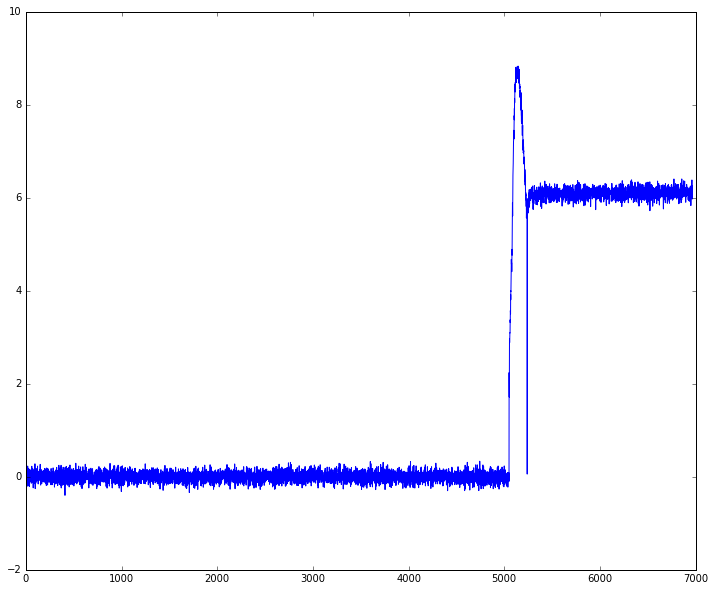

In [72]:
trajectory="higher_dmp"
data = h.get_data(trajectory)
w = data['raw_data']['w_raw'][2,:]
plt.figure(figsize=(12,10))
plt.plot(w)
plt.show()

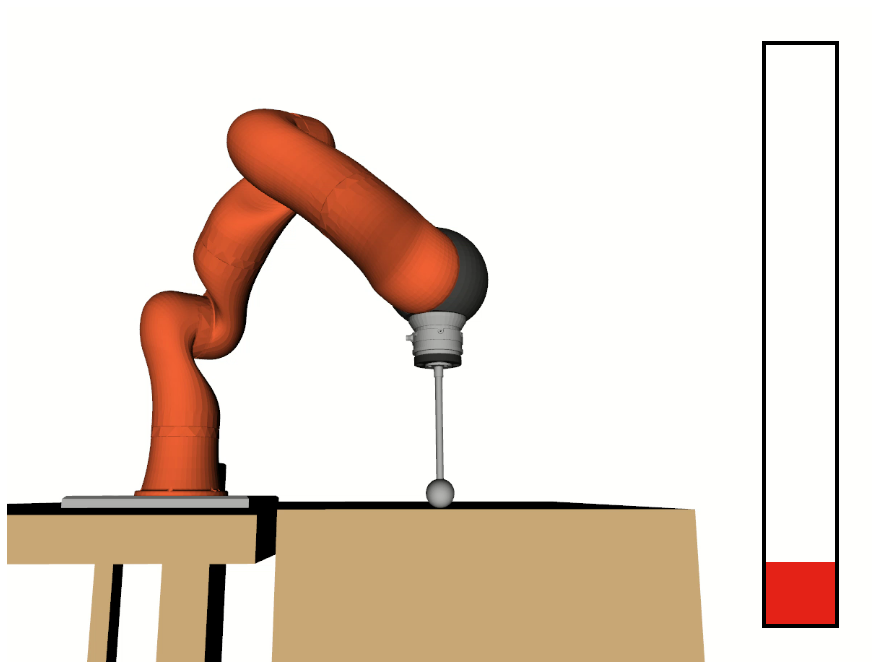

In [70]:
max_force = 50
start = 6000
end = 8000
mu = np.mean(w[start:end])

path = "/home/adam/Pictures/height_imgs"

with open (os.path.join(path, "%s.png" % trajectory)) as f:
    img = imread(f)

fz = mu * img.shape[0] / max_force
    
fig = plt.figure(figsize=(12,10), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
plt.xlim(0, img.shape[1])
plt.ylim(0, img.shape[0])
plt.bar(1100, fz, width=100, align='center', bottom=50, color='#E42217', linewidth=0.0)
plt.bar(1100, img.shape[0]-100, width=100, align='center', bottom=50, fc=(1, 1, 1, 0.0), linewidth=4.0)
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.savefig(os.path.join(path, "%s_f.png" % trajectory), bbox_inches='tight', pad_inches=0)
plt.show()

In [3]:
h = H5Interface(h5_filename='lrl_trajectories.h5')

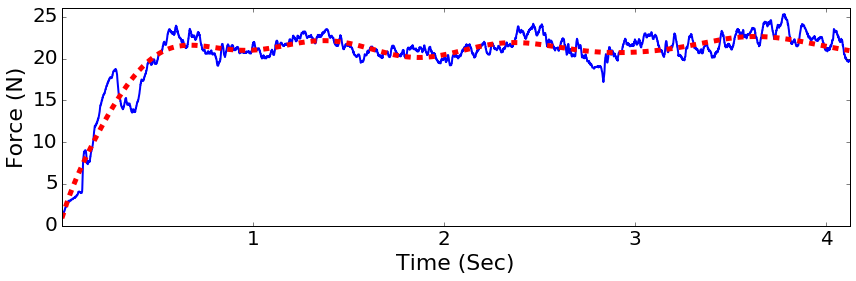

In [41]:
mag = h.get_data('trajectory_32', 'phase_2', 'mag')
cf_mag = h.get_data('trajectory_32', 'phase_2', 'cf_mags')
plt.figure(figsize=(12,4))

plt.plot(mag, lw=2.0, label='Raw Sensor')
plt.plot(cf_mag, lw=5.0, color='red', linestyle='--', label="Learned DMP")
plt.xlim(0, len(mag))
plt.ylim(0, 26)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([1000, 2000, 3000, 4000], [1, 2, 3, 4])
plt.xlabel("Time (Sec)", fontsize=22)
plt.ylabel("Force (N)", fontsize=22)
#leg = plt.legend(loc=2, prop={'size': 20})
#leg_lines = leg.get_lines()
#leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=10)
plt.tight_layout()
plt.savefig('test.png')
plt.show()

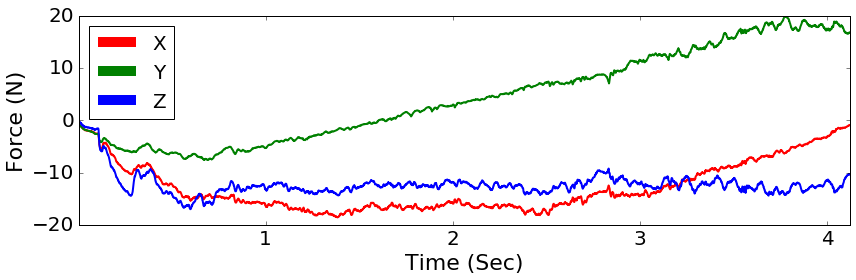

In [46]:
import copy
data = h.get_data('trajectory_32')
start = int(data['phase_2'].attrs['start'])
end = int(data['phase_2'].attrs['end'])
f = data['raw_data']['w_trans'][:3,start:end]
plt.figure(figsize=(12,4))
plt.plot(f[0,:], lw=2.0, label='X', color='red')
plt.plot(f[1,:], lw=2.0, label='Y', color='green')
plt.plot(f[2,:], lw=2.0, label='Z', color='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([1000, 2000, 3000, 4000], [1, 2, 3, 4])
plt.yticks([-20, -10, 0, 10, 20])
plt.xlabel("Time (Sec)", fontsize=22)
plt.ylabel("Force (N)", fontsize=22)
#leg = plt.legend(loc=2, prop={'size': 20})
plt.xlim(0, f.shape[1])
leg = plt.legend(loc=2, prop={'size': 20})
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=10)
plt.tight_layout()
plt.savefig('test2.png')
plt.show()